In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2


In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()



x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)


model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5)

model.save("hdr.model")

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2770 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1138 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0774 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0560 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0442 - accuracy: 0.9857


INFO:tensorflow:Assets written to: hdr.model\assets


INFO:tensorflow:Assets written to: hdr.model\assets


In [3]:
model =tf.keras.models.load_model('hdr.model')

loss, accuracy =model.evaluate(x_test,y_test)

print(loss)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0948 - accuracy: 0.9720
0.0948021188378334
0.972000002861023


1/1 [==============================] - 0s 112ms/step
This digit is : 2


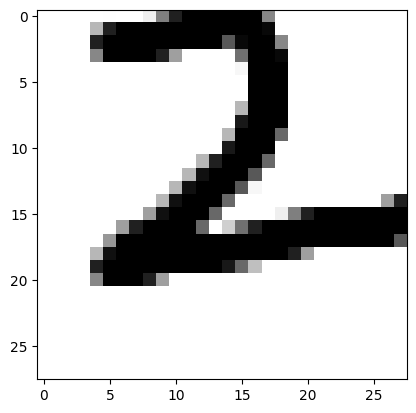

1/1 [==============================] - 0s 26ms/step
This digit is : 3


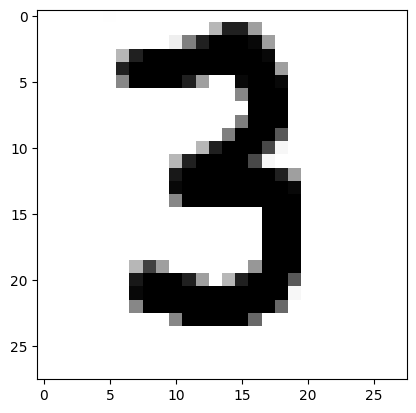

1/1 [==============================] - 0s 42ms/step
This digit is : 8


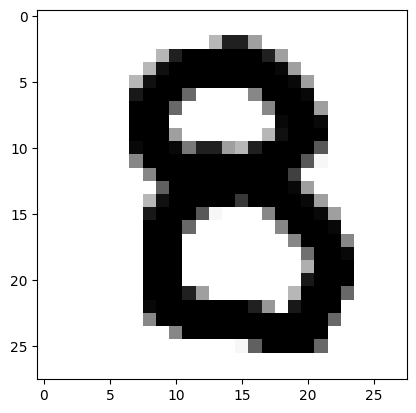

1/1 [==============================] - 0s 22ms/step
This digit is : 1


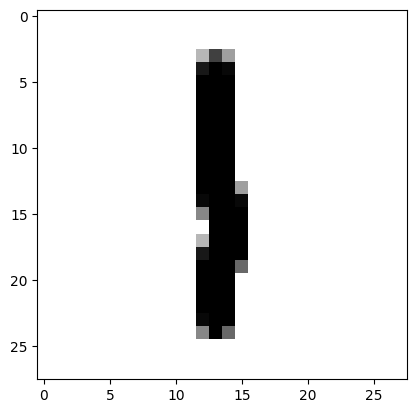

1/1 [==============================] - 0s 31ms/step
This digit is : 3


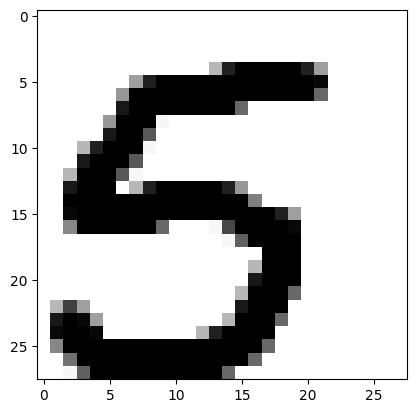

1/1 [==============================] - 0s 41ms/step
This digit is : 4


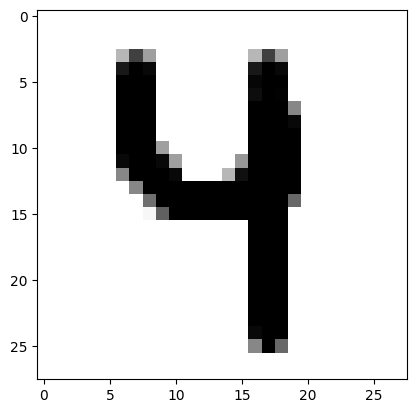

1/1 [==============================] - 0s 30ms/step
This digit is : 3


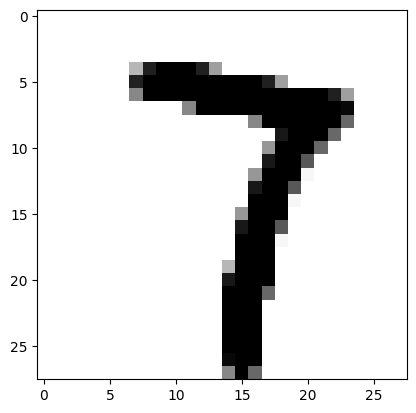

1/1 [==============================] - 0s 51ms/step
This digit is : 3


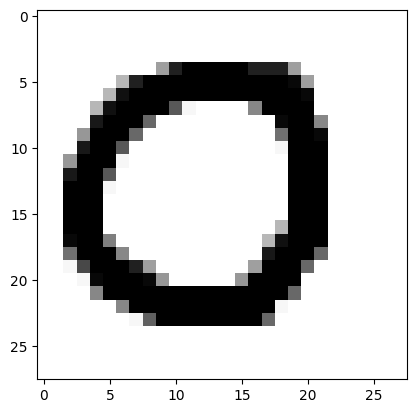

1/1 [==============================] - 0s 27ms/step
This digit is : 5


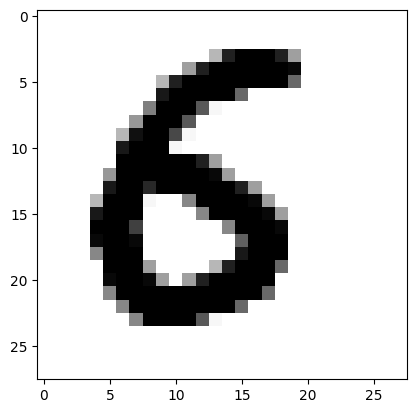

1/1 [==============================] - 0s 29ms/step
This digit is : 3


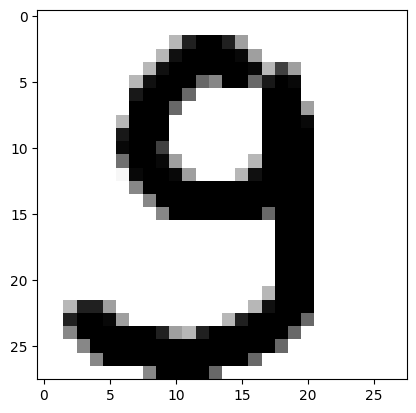

In [4]:
image_number = 1
while os.path.isfile(f"digits/digits{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digits{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction=model.predict(img)
        print(f"This digit is : {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_number +=1